#**Aritra Ray**

#**21IM10008**

In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import matplotlib.pyplot as plt
!unzip /content/lab_test_2_dataset.zip


Streaming output truncated to the last 5000 lines.
 extracting: lab_test_2_dataset/024/3431.png  
  inflating: lab_test_2_dataset/024/3048.png  
 extracting: lab_test_2_dataset/024/6422.png  
 extracting: lab_test_2_dataset/024/3237.png  
 extracting: lab_test_2_dataset/024/6415.png  
 extracting: lab_test_2_dataset/024/2541.png  
 extracting: lab_test_2_dataset/024/245.png  
 extracting: lab_test_2_dataset/024/5213.png  
 extracting: lab_test_2_dataset/024/3438.png  
 extracting: lab_test_2_dataset/024/2414.png  
 extracting: lab_test_2_dataset/024/9044.png  
 extracting: lab_test_2_dataset/024/1053.png  
 extracting: lab_test_2_dataset/024/3507.png  
 extracting: lab_test_2_dataset/024/5341.png  
 extracting: lab_test_2_dataset/024/6791.png  
 extracting: lab_test_2_dataset/024/2527.png  
 extracting: lab_test_2_dataset/024/2429.png  
 extracting: lab_test_2_dataset/024/835.png  
 extracting: lab_test_2_dataset/024/6267.png  
 extracting: lab_test_2_dataset/024/4084.png  
 extracting

#EXPERIMENT 1

In [2]:
# Seed for reproducibility
seed_value = 2021  # Joining year is 2021 as roll number starts with 21
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

# Setting device to CPU
device = torch.device('cpu')
print("Experiment 1:")
print("Seed value:", seed_value)
print("Device:", device)

Experiment 1:
Seed value: 2021
Device: cpu


#EXPERIMENT 2

In [3]:
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load data
data_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root='lab_test_2_dataset', transform=data_transform)

# Shuffle and split data
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=seed_value)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=seed_value)

# Create dataloaders
batch_size = 32 #2^5
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

print("\nExperiment 2:")
print("Overall dataset size:", len(dataset))
print("Training dataset size:", len(train_data))
print("Validation dataset size:", len(val_data))
print("Testing dataset size:", len(test_data))


Experiment 2:
Overall dataset size: 9778
Training dataset size: 6844
Validation dataset size: 1467
Testing dataset size: 1467


#EXPERIMENT 3

In [4]:
class CNNRegression(nn.Module):
    def __init__(self):
        super(CNNRegression, self).__init__()
        self.conv1=nn.Conv2d(3,16,3,1,1)
        self.conv2=nn.Conv2d(16,32,3,1,1)
        self.fc1=nn.Linear(32*8*8,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,1)
    def forward(self,x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1,32*8*8)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Chosen conventional hyper parameter
model = CNNRegression().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print("\nExperiment 3:")
print("Model architecture:")
print(model)
print("Loss function: Mean Squared Error")
print("Optimizer: Adam")
print("Learning rate: 0.001")


Experiment 3:
Model architecture:
CNNRegression(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)
Loss function: Mean Squared Error
Optimizer: Adam
Learning rate: 0.001


#EXPERIMENT 4

Epoch 1/25, Training Loss: 673.2315430186911, Validation Loss: 571.5314032535774
Epoch 2/25, Training Loss: 449.5344676960288, Validation Loss: 290.94569988809803
Epoch 3/25, Training Loss: 305.9452217409724, Validation Loss: 255.28991817794207
Epoch 4/25, Training Loss: 270.2580793103163, Validation Loss: 263.651256589883
Epoch 5/25, Training Loss: 243.82588953835304, Validation Loss: 212.57143892523538
Epoch 6/25, Training Loss: 223.49389528935586, Validation Loss: 207.83732848372196
Epoch 7/25, Training Loss: 206.29454906470312, Validation Loss: 200.85022803724584
Epoch 8/25, Training Loss: 190.53570364010676, Validation Loss: 179.98050315768523
Epoch 9/25, Training Loss: 178.75171907069318, Validation Loss: 170.8085357208356
Epoch 10/25, Training Loss: 162.85750094245986, Validation Loss: 155.61327288730988
Epoch 11/25, Training Loss: 148.470796960756, Validation Loss: 146.2483990181037
Epoch 12/25, Training Loss: 141.40548286460285, Validation Loss: 138.7956825833623
Epoch 13/25, 

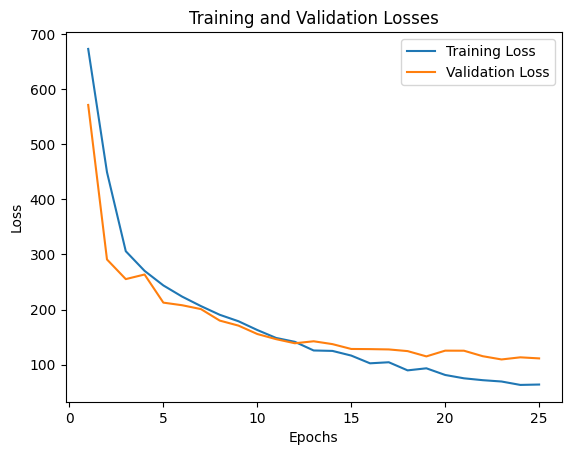

In [5]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=25):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        running_loss = 0.0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(val_loader.dataset)
        val_losses.append(epoch_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}')

    return train_losses, val_losses

# Model training
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader)

# Plot
num_epochs=25
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

#EXPERIMENT 5


Experiment 5:
Test MSE Loss: 135.60601513842457


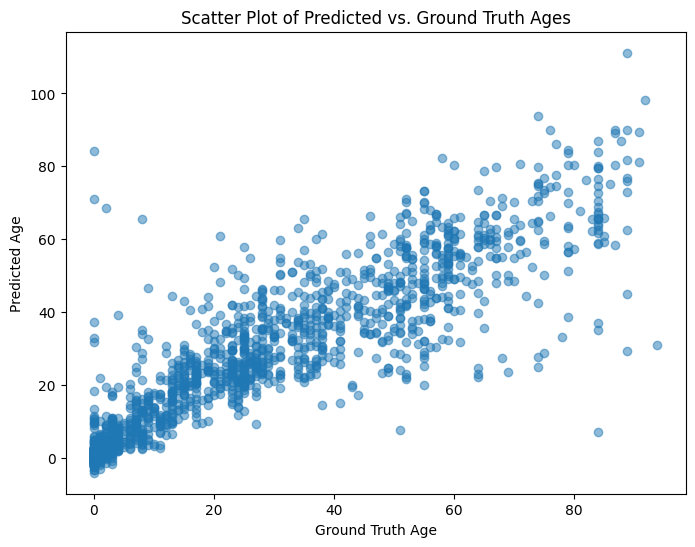

In [6]:
def evaluate_model(model,criterion, text_loader):
    model.eval()
    test_loss = 0.0
    predictions = []
    ground_truth = []
    with torch.no_grad():
        for inputs, labels in text_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            outputs = model(inputs)
            Loss = criterion(outputs.squeeze(),labels)
            test_loss += Loss.item()*inputs.size(0)
            predictions.extend(outputs.squeeze().cpu().numpy())
            ground_truth.extend(labels.cpu().numpy())
    test_loss /= len(test_loader.dataset)
    return test_loss, predictions, ground_truth

# Evaluating test set
test_loss, predictions, ground_truth = evaluate_model(model, criterion, test_loader)
print("\nExperiment 5:")
print("Test MSE Loss:", test_loss)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(ground_truth, predictions, alpha=0.5)
plt.xlabel("Ground Truth Age")
plt.ylabel("Predicted Age")
plt.title("Scatter Plot of Predicted vs. Ground Truth Ages")
plt.show()